In [10]:
import xgboost as xgb  # model
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
data = pd.read_csv('data.csv')  # read csv
X = data.iloc[:, :25]  # X feature

### **J_sc**

Best Parameters for jsc: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 7, 'max_features': None, 'n_estimators': 40, 'subsample': 0.8}
MSE: 4.1160, RMSE: 2.0288, R²: 0.9095, MAE:1.1786960678715859
Params: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 7, 'max_features': None, 'n_estimators': 40, 'subsample': 0.8}
Mean Test R²: 0.8465892392557024
Mean Test Neg MSE: -6.018114433012785
Std Test R²: 0.05743459160362552
Std Test Neg MSE: 2.972972141840633
--------------------------------------------------
Params: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 40, 'subsample': 0.8}
Mean Test R²: 0.8465892392557024
Mean Test Neg MSE: -6.018114433012785
Std Test R²: 0.05743459160362552
Std Test Neg MSE: 2.972972141840633
--------------------------------------------------
Params: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 7, 'max_features': 'log2', 'n_estimators': 40, 'subsample': 0.8}
Mean Te

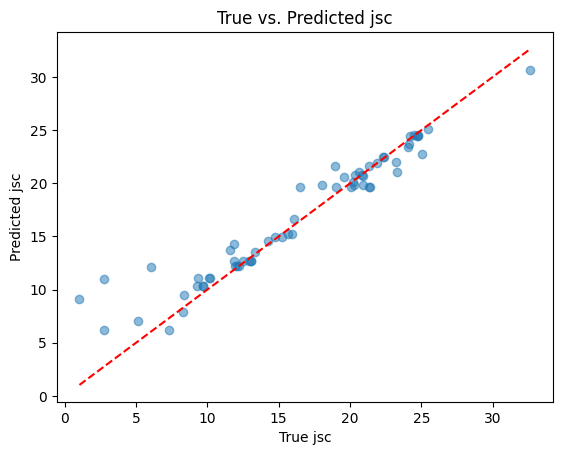

In [12]:
# 1. data split
X_jsc = data.iloc[:, :25]  # X feature
y_jsc = data['Jsc']  # target feature
X_jsc_train, X_jsc_test, y_jsc_train, y_jsc_test = train_test_split(X_jsc, y_jsc, test_size=0.1, random_state=42)

# 2. XGBoost model

# parameter grid
param_grid_jsc = {
    'n_estimators': [10 * (x + 1) for x in range(10)],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'max_features': [None, 'sqrt', 'log2']
}

# Initialize XGBoost regressor
xgb_reg = xgb.XGBRegressor(random_state=42) 

# 3. Grid searching for jsc
grid_jsc_search = GridSearchCV(
    estimator=xgb_reg,
    param_grid=param_grid_jsc,
    cv=5,
    scoring= {'r2': 'r2', 'neg_mse': 'neg_mean_squared_error'},  # two standard
    refit='r2',  # Select the best model based on R ²
    n_jobs=-1
)

grid_jsc_search.fit(X_jsc_train, y_jsc_train)

# Best model for jsc
best_xgb_reg_jsc = grid_jsc_search.best_estimator_


# 4. Model evaluation on test set for jsc
y_jsc_pred = best_xgb_reg_jsc.predict(X_jsc_test)
mse_jsc = mean_squared_error(y_jsc_test, y_jsc_pred)
rmse_jsc = mse_jsc**0.5
mae_jsc = mean_absolute_error(y_jsc_test, y_jsc_pred)
r2_jsc = r2_score(y_jsc_test, y_jsc_pred)

print(f"Best Parameters for jsc: {grid_jsc_search.best_params_}")
print(f"MSE: {mse_jsc:.4f}, RMSE: {rmse_jsc:.4f}, R²: {r2_jsc:.4f}, MAE:{mae_jsc}")

# 5. Get cross-validation results for jsc
cv_jsc_results_df = pd.DataFrame(grid_jsc_search.cv_results_)
cv_jsc_results_df = cv_jsc_results_df.sort_values(by='mean_test_r2', ascending=False)  # sort by r^2

# Best CV score for jsc
best_cv_jsc_score_r2 = grid_jsc_search.best_score_
best_cv_jsc_score_neg_mse = -grid_jsc_search.cv_results_['mean_test_neg_mse'][grid_jsc_search.best_index_]

for index, row in cv_jsc_results_df.head(10).iterrows():
    print(f"Params: {row['params']}")
    print(f"Mean Test R²: {row['mean_test_r2']}")
    print(f"Mean Test Neg MSE: {row['mean_test_neg_mse']}")
    print(f"Std Test R²: {row['std_test_r2']}")
    print(f"Std Test Neg MSE: {row['std_test_neg_mse']}")
    print("-" * 50)

print(f"Best Cross-Validation R² for jsc: {best_cv_jsc_score_r2}")
print(f"Best Cross-Validation neg_mean_squared_error for jsc: {best_cv_jsc_score_neg_mse}")
print(f"Best parameters via GridSearchCV for jsc: {grid_jsc_search.best_params_}")


# 6. Visualization for jsc
plt.scatter(y_jsc_test, y_jsc_pred, alpha=0.5)
plt.plot([y_jsc_test.min(), y_jsc_test.max()], [y_jsc_test.min(), y_jsc_test.max()], 'r--')
plt.xlabel('True jsc')
plt.ylabel('Predicted jsc')
plt.title('True vs. Predicted jsc')
plt.show()

### **V_oc**

Best Parameters for voc: {'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 5, 'max_features': None, 'n_estimators': 50, 'subsample': 0.8}
MSE: 0.0090, RMSE: 0.0949, R²: 0.9136, MAE:0.056314595691619375
Params: {'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 5, 'max_features': None, 'n_estimators': 50, 'subsample': 0.8}
Mean Test R²: 0.9370207672326792
Mean Test Neg MSE: -0.005673439813024875
Std Test R²: 0.019854553508230864
Std Test Neg MSE: 0.0019864007955165074
--------------------------------------------------
Params: {'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 5, 'max_features': 'log2', 'n_estimators': 50, 'subsample': 0.8}
Mean Test R²: 0.9370207672326792
Mean Test Neg MSE: -0.005673439813024875
Std Test R²: 0.019854553508230864
Std Test Neg MSE: 0.0019864007955165074
--------------------------------------------------
Params: {'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 50, 'subsam

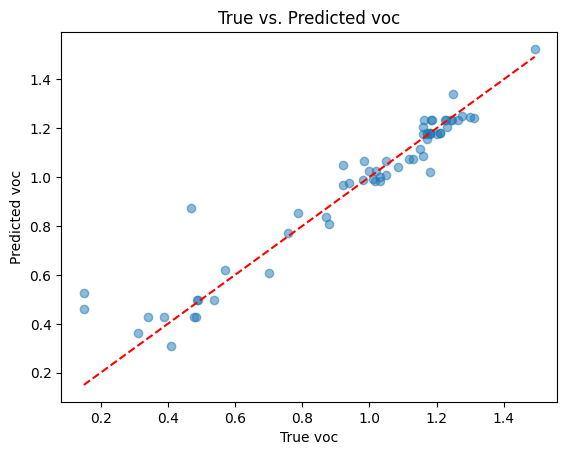

In [13]:
# 1. data split
X_voc = data.iloc[:, :25]  # X feature
y_voc = data['Voc']  # target feature
X_voc_train, X_voc_test, y_voc_train, y_voc_test = train_test_split(X_voc, y_voc, test_size=0.1, random_state=42)

# 2. XGBoost model

# parameter grid
param_grid_voc = {
    'n_estimators': [10 * (x + 1) for x in range(10)],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'max_features': [None, 'sqrt', 'log2']
}

# Initialize XGBoost regressor
xgb_reg = xgb.XGBRegressor(random_state=42) 

# 3. Grid searching for voc
grid_voc_search = GridSearchCV(
    estimator=xgb_reg,
    param_grid=param_grid_voc,
    cv=5,
    scoring= {'r2': 'r2', 'neg_mse': 'neg_mean_squared_error'},  # two standard
    refit='r2',  # Select the best model based on R ²
    n_jobs=-1
)

grid_voc_search.fit(X_voc_train, y_voc_train)

# Best model for voc
best_xgb_reg_voc = grid_voc_search.best_estimator_


# 4. Model evaluation on test set for voc
y_voc_pred = best_xgb_reg_voc.predict(X_voc_test)
mse_voc = mean_squared_error(y_voc_test, y_voc_pred)
rmse_voc = mse_voc**0.5
mae_voc = mean_absolute_error(y_voc_test, y_voc_pred)
r2_voc = r2_score(y_voc_test, y_voc_pred)

print(f"Best Parameters for voc: {grid_voc_search.best_params_}")
print(f"MSE: {mse_voc:.4f}, RMSE: {rmse_voc:.4f}, R²: {r2_voc:.4f}, MAE:{mae_voc}")

# 5. Get cross-validation results for voc
cv_voc_results_df = pd.DataFrame(grid_voc_search.cv_results_)
cv_voc_results_df = cv_voc_results_df.sort_values(by='mean_test_r2', ascending=False)  # sort by r^2

# Best CV score for voc
best_cv_voc_score_r2 = grid_voc_search.best_score_
best_cv_voc_score_neg_mse = -grid_voc_search.cv_results_['mean_test_neg_mse'][grid_voc_search.best_index_]

for index, row in cv_voc_results_df.head(10).iterrows():
    print(f"Params: {row['params']}")
    print(f"Mean Test R²: {row['mean_test_r2']}")
    print(f"Mean Test Neg MSE: {row['mean_test_neg_mse']}")
    print(f"Std Test R²: {row['std_test_r2']}")
    print(f"Std Test Neg MSE: {row['std_test_neg_mse']}")
    print("-" * 50)

print(f"Best Cross-Validation R² for voc: {best_cv_voc_score_r2}")
print(f"Best Cross-Validation neg_mean_squared_error for voc: {best_cv_voc_score_neg_mse}")
print(f"Best parameters via GridSearchCV for voc: {grid_voc_search.best_params_}")


# 6. Visualization for voc
plt.scatter(y_voc_test, y_voc_pred, alpha=0.5)
plt.plot([y_voc_test.min(), y_voc_test.max()], [y_voc_test.min(), y_voc_test.max()], 'r--')
plt.xlabel('True voc')
plt.ylabel('Predicted voc')
plt.title('True vs. Predicted voc')
plt.show()

### **FF**

Best Parameters for ff: {'colsample_bytree': 0.9, 'learning_rate': 0.2, 'max_depth': 7, 'max_features': None, 'n_estimators': 20, 'subsample': 0.8}
MSE: 0.0036, RMSE: 0.0598, R²: 0.5951, MAE:0.039735829537914644
Params: {'colsample_bytree': 0.9, 'learning_rate': 0.2, 'max_depth': 7, 'max_features': None, 'n_estimators': 20, 'subsample': 0.8}
Mean Test R²: 0.6545644772207998
Mean Test Neg MSE: -0.0033368702813288817
Std Test R²: 0.07781539647380657
Std Test Neg MSE: 0.0009231571350394174
--------------------------------------------------
Params: {'colsample_bytree': 0.9, 'learning_rate': 0.2, 'max_depth': 7, 'max_features': 'log2', 'n_estimators': 20, 'subsample': 0.8}
Mean Test R²: 0.6545644772207998
Mean Test Neg MSE: -0.0033368702813288817
Std Test R²: 0.07781539647380657
Std Test Neg MSE: 0.0009231571350394174
--------------------------------------------------
Params: {'colsample_bytree': 0.9, 'learning_rate': 0.2, 'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 20, 'subsamp

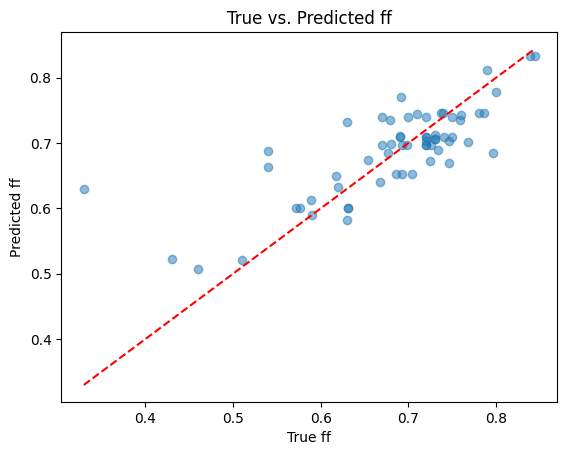

In [14]:
# 1. data split
X_ff = data.iloc[:, :25]  # X feature
y_ff = data['FF']  # target feature
X_ff_train, X_ff_test, y_ff_train, y_ff_test = train_test_split(X_ff, y_ff, test_size=0.1, random_state=42)

# 2. XGBoost model

# parameter grid
param_grid_ff = {
    'n_estimators': [10 * (x + 1) for x in range(10)],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'max_features': [None, 'sqrt', 'log2']
}

# Initialize XGBoost regressor
xgb_reg = xgb.XGBRegressor(random_state=42) 

# 3. Grid searching for ff
grid_ff_search = GridSearchCV(
    estimator=xgb_reg,
    param_grid=param_grid_ff,
    cv=5,
    scoring= {'r2': 'r2', 'neg_mse': 'neg_mean_squared_error'},  # two standard
    refit='r2',  # Select the best model based on R ²
    n_jobs=-1
)

grid_ff_search.fit(X_ff_train, y_ff_train)

# Best model for ff
best_xgb_reg_ff = grid_ff_search.best_estimator_


# 4. Model evaluation on test set for ff
y_ff_pred = best_xgb_reg_ff.predict(X_ff_test)
mse_ff = mean_squared_error(y_ff_test, y_ff_pred)
rmse_ff = mse_ff**0.5
mae_ff = mean_absolute_error(y_ff_test, y_ff_pred)
r2_ff = r2_score(y_ff_test, y_ff_pred)

print(f"Best Parameters for ff: {grid_ff_search.best_params_}")
print(f"MSE: {mse_ff:.4f}, RMSE: {rmse_ff:.4f}, R²: {r2_ff:.4f}, MAE:{mae_ff}")

# 5. Get cross-validation results for ff
cv_ff_results_df = pd.DataFrame(grid_ff_search.cv_results_)
cv_ff_results_df = cv_ff_results_df.sort_values(by='mean_test_r2', ascending=False)  # sort by r^2

# Best CV score for ff
best_cv_ff_score_r2 = grid_ff_search.best_score_
best_cv_ff_score_neg_mse = -grid_ff_search.cv_results_['mean_test_neg_mse'][grid_ff_search.best_index_]

for index, row in cv_ff_results_df.head(10).iterrows():
    print(f"Params: {row['params']}")
    print(f"Mean Test R²: {row['mean_test_r2']}")
    print(f"Mean Test Neg MSE: {row['mean_test_neg_mse']}")
    print(f"Std Test R²: {row['std_test_r2']}")
    print(f"Std Test Neg MSE: {row['std_test_neg_mse']}")
    print("-" * 50)

print(f"Best Cross-Validation R² for ff: {best_cv_ff_score_r2}")
print(f"Best Cross-Validation neg_mean_squared_error for ff: {best_cv_ff_score_neg_mse}")
print(f"Best parameters via GridSearchCV for ff: {grid_ff_search.best_params_}")


# 6. Visualization for ff
plt.scatter(y_ff_test, y_ff_pred, alpha=0.5)
plt.plot([y_ff_test.min(), y_ff_test.max()], [y_ff_test.min(), y_ff_test.max()], 'r--')
plt.xlabel('True ff')
plt.ylabel('Predicted ff')
plt.title('True vs. Predicted ff')
plt.show()

### **PCE**

Best Parameters for pce: {'colsample_bytree': 0.95, 'learning_rate': 0.2, 'max_depth': 7, 'max_features': None, 'n_estimators': 30, 'subsample': 0.8}
MSE: 3.6949, RMSE: 1.9222, MAE:1.310532, R²: 0.9139 
Params: {'colsample_bytree': 0.95, 'learning_rate': 0.2, 'max_depth': 7, 'max_features': 'log2', 'n_estimators': 30, 'subsample': 0.8}
Mean Test R²: 0.8650798654970716
Mean Test Neg MSE: -4.567938821029761
Std Test R²: 0.04572580275325538
Std Test Neg MSE: 1.5913743742266027
--------------------------------------------------
Params: {'colsample_bytree': 0.95, 'learning_rate': 0.2, 'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 30, 'subsample': 0.8}
Mean Test R²: 0.8650798654970716
Mean Test Neg MSE: -4.567938821029761
Std Test R²: 0.04572580275325538
Std Test Neg MSE: 1.5913743742266027
--------------------------------------------------
Params: {'colsample_bytree': 0.95, 'learning_rate': 0.2, 'max_depth': 7, 'max_features': None, 'n_estimators': 30, 'subsample': 0.8}
Mean Test 

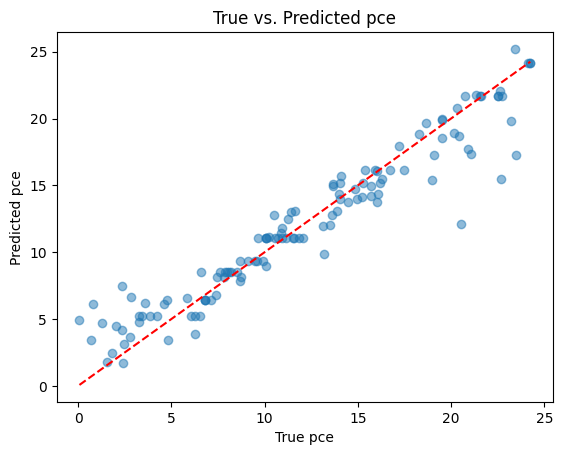

In [15]:
# 1. data split
X_pce = data.iloc[:, :25]  # X feature
y_pce = data['PCE']  # target feature
X_pce_train, X_pce_test, y_pce_train, y_pce_test = train_test_split(X_pce, y_pce, test_size=0.2, random_state=42)

# 2. XGBoost model

# parameter grid
param_grid_pce = {
    'n_estimators': [30, 50, 70],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.2, 0.25, 0.5],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.95],
    'max_features': [None, 'sqrt', 'log2']
}

# Initialize XGBoost regressor
xgb_reg = xgb.XGBRegressor(random_state=42) 

# 3. Grid searching for pce
grid_pce_search = GridSearchCV(
    estimator=xgb_reg,
    param_grid=param_grid_pce,
    cv=5,
    scoring= {'r2': 'r2', 'neg_mse': 'neg_mean_squared_error'},  # two standard
    refit='r2',  # Select the best model based on R ²
    n_jobs=-1
)

grid_pce_search.fit(X_pce_train, y_pce_train)

# Best model for pce
best_xgb_reg_pce = grid_pce_search.best_estimator_


# 4. Model evaluation on test set for pce
y_pce_pred = best_xgb_reg_pce.predict(X_pce_test)
mse_pce = mean_squared_error(y_pce_test, y_pce_pred)
rmse_pce = mse_pce**0.5
mae_pce = mean_absolute_error(y_pce_test, y_pce_pred)
r2_pce = r2_score(y_pce_test, y_pce_pred)

print(f"Best Parameters for pce: {grid_pce_search.best_params_}")
print(f"MSE: {mse_pce:.4f}, RMSE: {rmse_pce:.4f}, MAE:{mae_pce:4f}, R²: {r2_pce:.4f} ")

# 5. Get cross-validation results for pce
cv_pce_results_df = pd.DataFrame(grid_pce_search.cv_results_)
cv_pce_results_df = cv_pce_results_df.sort_values(by='mean_test_r2', ascending=False)  # sort by r^2

# Best CV score for pce
best_cv_pce_score_r2 = grid_pce_search.best_score_
best_cv_pce_score_neg_mse = -grid_pce_search.cv_results_['mean_test_neg_mse'][grid_pce_search.best_index_]

for index, row in cv_pce_results_df.head(10).iterrows():
    print(f"Params: {row['params']}")
    print(f"Mean Test R²: {row['mean_test_r2']}")
    print(f"Mean Test Neg MSE: {row['mean_test_neg_mse']}")
    print(f"Std Test R²: {row['std_test_r2']}")
    print(f"Std Test Neg MSE: {row['std_test_neg_mse']}")
    print("-" * 50)

print(f"Best Cross-Validation R² for pce: {best_cv_pce_score_r2}")
print(f"Best Cross-Validation neg_mean_squared_error for pce: {best_cv_pce_score_neg_mse}")
print(f"Best parameters via GridSearchCV for pce: {grid_pce_search.best_params_}")


# 6. Visualization for pce
plt.scatter(y_pce_test, y_pce_pred, alpha=0.5)
plt.plot([y_pce_test.min(), y_pce_test.max()], [y_pce_test.min(), y_pce_test.max()], 'r--')
plt.xlabel('True pce')
plt.ylabel('Predicted pce')
plt.title('True vs. Predicted pce')
plt.show()

# SHAP解释器

In [23]:
import shap
explainer = shap.explainers.Permutation(best_xgb_reg_pce.predict, X_pce)
shap_values = explainer.shap_values(X_pce)

PermutationExplainer explainer: 981it [02:01,  7.37it/s]                         


C:\Users\82308\AppData\Local\Temp\ipykernel_9164\726641763.py:2: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_pce, max_display=10)


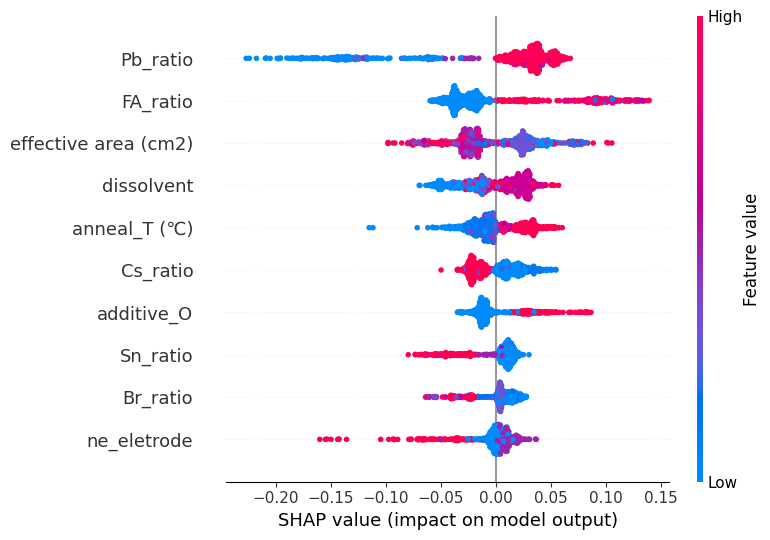

In [24]:
### summary_plot
shap.summary_plot(shap_values, X_pce, max_display=10)